# Phần 1: Principal Component Analysis (PCA) 
# Mục tiêu: Hiểu và áp dụng PCA để giảm chiều dữ liệu và phân tích thành phần chính. 
# Dữ liệu: Sử dụng bộ dữ liệu Delay Prediction hoặc bất kỳ bộ dữ liệu nhiều chiều nào.

In [657]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [658]:
# Read data from file 
data = pd.read_csv("data\delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv")

In [659]:
# Displays the first 5 data samples
data.head()

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244


In [660]:
# Convert string data to numbers using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [661]:
# Display data
data

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,47,0,15650,21031103,344472,582,7998,331,8,1,...,0,1020,2.0,0,25,4,453.0,1267,NaN,135557
1,36,0,6061,3712333,641,451,1420,19,1,1,...,0,120,1.0,0,12,5,451.0,1267,NaN,134532
2,6,0,7347,21045918,32167,667,8618,510,1,1,...,0,18000,3.0,0,8,5,410.0,1267,NaN,160936
3,6,0,2073,21058302,710046,421,6607,544,1,1,...,0,500,2.0,0,8,5,453.0,1267,NaN,160702
4,47,0,8544,21050569,107539,509,5994,551,6,1,...,0,36,2.0,0,25,4,455.0,1267,NaN,160244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,22,0,24402,21020310,147666,807,5982,319,1,1,...,0,100,3.0,1,27,3,NaN,1267,NaN,84245
26213,22,0,22772,23027680,251577,779,9535,489,2,1,...,10,315,3.0,1,27,3,401.0,1267,NaN,190113
26214,22,0,22430,3721101,251577,451,726,169,1,1,...,0,28,1.0,1,27,3,NaN,1267,NaN,195137
26215,42,0,21878,6050902,254252,451,5182,47,6,0,...,0,40,2.0,1,19,5,401.0,1267,NaN,160258


In [662]:
# Display features
data.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'REASON_CD', 'SOUF_RCV_NO', 'QTUF_RCV_NO', 'SO_TIME'],
      dtype='object')

In [663]:
col = ['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'REASON_CD', 'SOUF_RCV_NO', 'QTUF_RCV_NO', 'SO_TIME']

In [664]:
# Standardized data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [665]:
# Display data
data

array([[ 0.64781761,  0.        ,  0.33587925, ...,  0.19415187,
                nan, -0.03995309],
       [ 0.13816266,  0.        , -0.93113339, ...,  0.19415187,
                nan, -0.07156091],
       [-1.25180539,  0.        , -0.76121179, ...,  0.19415187,
                nan,  0.74265667],
       ...,
       [-0.5104891 ,  0.        ,  1.23173343, ...,  0.19415187,
                nan,  1.79730959],
       [ 0.41615627,  0.        ,  1.15879663, ...,  0.19415187,
                nan,  0.72174925],
       [ 1.52813071,  0.        ,  1.16038221, ...,  0.19415187,
                nan,  1.3806722 ]])

In [666]:
# Handle missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(data)

In [667]:
# Convert data numpy to dataframe
data = pd.DataFrame(data, columns=col)
data

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,0.647818,0.0,0.335879,1.652334,0.342148,1.083543,1.430088,0.879575,-0.059091,0.104648,...,-0.045246,-0.056712,0.669431,-0.214384,1.276514,0.573905,9.135142e-01,0.194152,1.480297e-16,-0.039953
1,0.138163,0.0,-0.931133,-0.577695,-1.056991,-0.033263,-1.084976,-1.264815,-0.060676,0.104648,...,-0.045246,-0.133352,-0.598117,-0.214384,-0.215348,1.240959,8.673902e-01,0.194152,1.480297e-16,-0.071561
2,-1.251805,0.0,-0.761212,1.654242,-0.928703,1.808188,1.667142,2.109851,-0.060676,0.104648,...,-0.045246,1.389235,1.936980,-0.214384,-0.674383,1.240959,-7.815016e-02,0.194152,1.480297e-16,0.742657
3,-1.251805,0.0,-1.458075,1.655836,1.829766,-0.289020,0.898246,2.343534,-0.060676,0.104648,...,-0.045246,-0.100993,0.669431,-0.214384,-0.674383,1.240959,9.135142e-01,0.194152,1.480297e-16,0.735441
4,0.647818,0.0,-0.603050,1.654840,-0.621995,0.461201,0.663869,2.391645,-0.059544,0.104648,...,-0.045246,-0.140506,0.669431,-0.214384,1.276514,0.573905,9.596381e-01,0.194152,1.480297e-16,0.721318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,-0.510489,0.0,1.492298,1.650944,-0.458707,3.001721,0.659281,0.797099,-0.060676,0.104648,...,-0.045246,-0.135056,1.936980,4.664527,1.506032,-0.093149,-5.237338e-16,0.194152,1.480297e-16,-1.622256
26213,-0.510489,0.0,1.276923,1.909421,-0.035866,2.763015,2.017752,1.965517,-0.060450,0.104648,...,-0.005393,-0.116747,1.936980,4.664527,1.506032,-0.093149,-2.857078e-01,0.194152,1.480297e-16,1.642385
26214,-0.510489,0.0,1.231733,-0.576566,-0.035866,-0.033263,-1.350323,-0.233858,-0.060676,0.104648,...,-0.045246,-0.141187,-0.598117,4.664527,1.506032,-0.093149,-5.237338e-16,0.194152,1.480297e-16,1.797310
26215,0.416156,0.0,1.158797,-0.276572,-0.024981,-0.033263,0.353405,-1.072369,-0.059544,-9.555803,...,-0.045246,-0.140165,0.669431,4.664527,0.587962,1.240959,-2.857078e-01,0.194152,1.480297e-16,0.721749


In [668]:
# Function Principal Component Analysis
def myPCA(A):
    cov_matrix = np.cov(A.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    return eigenvectors, eigenvalues

In [669]:
eigenvectors, eigenvalues = myPCA(data.values)

In [670]:
eigenvectors

array([[-3.57710229e-02,  2.56173336e-02,  1.71521198e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.01298399e-02, -1.09667258e-01,  1.89866009e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.36612740e-01,  1.73961822e-01,  1.10848572e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.81394297e-04,  6.99391533e-04,  4.29322555e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.20013239e-03, -2.17655880e-02, -3.23108966e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [671]:
eigenvalues

array([ 4.67835384e+00,  3.08451966e+00,  2.20769813e+00,  2.06433229e+00,
        1.80742777e+00,  1.71627986e+00,  1.40614291e+00,  8.03130122e-02,
        8.23144065e-03,  3.17907653e-03,  2.38589045e-01,  2.52939886e-01,
        2.84030732e-01,  4.04205794e-01,  4.83915718e-01,  1.21231169e+00,
        6.37791168e-01,  1.17048491e+00,  7.30730865e-01,  1.10975501e+00,
        7.81284979e-01,  1.07010163e+00,  1.02822856e+00,  1.04005626e+00,
        8.20899601e-01,  8.45670819e-01,  8.78968873e-01,  9.13145218e-01,
        9.20483913e-01,  9.54379575e-01,  5.46284035e-09,  1.67189796e-16,
       -4.04022339e-17,  2.36149070e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [672]:
# Sorted the eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:,sorted_indices]

In [673]:
sorted_eigenvectors

array([[-3.57710229e-02,  2.56173336e-02,  1.71521198e-01, ...,
         0.00000000e+00,  0.00000000e+00, -4.78794995e-15],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.01298399e-02, -1.09667258e-01,  1.89866009e-02, ...,
         0.00000000e+00,  0.00000000e+00, -3.88743153e-15],
       ...,
       [ 1.36612740e-01,  1.73961822e-01,  1.10848572e-01, ...,
         0.00000000e+00,  0.00000000e+00,  3.38646473e-15],
       [ 3.81394297e-04,  6.99391533e-04,  4.29322555e-04, ...,
         0.00000000e+00,  0.00000000e+00, -1.31523815e-15],
       [ 2.20013239e-03, -2.17655880e-02, -3.23108966e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.49455847e-15]])

In [674]:
sorted_eigenvalues

array([ 4.67835384e+00,  3.08451966e+00,  2.20769813e+00,  2.06433229e+00,
        1.80742777e+00,  1.71627986e+00,  1.40614291e+00,  1.21231169e+00,
        1.17048491e+00,  1.10975501e+00,  1.07010163e+00,  1.04005626e+00,
        1.02822856e+00,  9.54379575e-01,  9.20483913e-01,  9.13145218e-01,
        8.78968873e-01,  8.45670819e-01,  8.20899601e-01,  7.81284979e-01,
        7.30730865e-01,  6.37791168e-01,  4.83915718e-01,  4.04205794e-01,
        2.84030732e-01,  2.52939886e-01,  2.38589045e-01,  8.03130122e-02,
        8.23144065e-03,  3.17907653e-03,  5.46284035e-09,  1.67189796e-16,
        2.36149070e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.04022339e-17])

In [675]:
# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)


In [676]:
explained_variance


array([ 1.42483079e-01,  9.39415598e-02,  6.72372457e-02,  6.28709222e-02,
        5.50466855e-02,  5.22707017e-02,  4.28252283e-02,  3.69219405e-02,
        3.56480719e-02,  3.37984930e-02,  3.25908172e-02,  3.16757610e-02,
        3.13155387e-02,  2.90664077e-02,  2.80340877e-02,  2.78105817e-02,
        2.67697133e-02,  2.57555939e-02,  2.50011663e-02,  2.37946707e-02,
        2.22550040e-02,  1.94244498e-02,  1.47380475e-02,  1.23104169e-02,
        8.65038742e-03,  7.70349036e-03,  7.26642381e-03,  2.44599823e-03,
        2.50695233e-04,  9.68213665e-05,  1.66375254e-10,  5.09190150e-18,
        7.19211238e-19,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.23048296e-18])

In [677]:
cumulative_explained_variance

array([0.14248308, 0.23642464, 0.30366188, 0.36653281, 0.42157949,
       0.47385019, 0.51667542, 0.55359736, 0.58924543, 0.62304393,
       0.65563474, 0.68731051, 0.71862604, 0.74769245, 0.77572654,
       0.80353712, 0.83030683, 0.85606243, 0.88106359, 0.90485827,
       0.92711327, 0.94653772, 0.96127577, 0.97358618, 0.98223657,
       0.98994006, 0.99720649, 0.99965248, 0.99990318, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

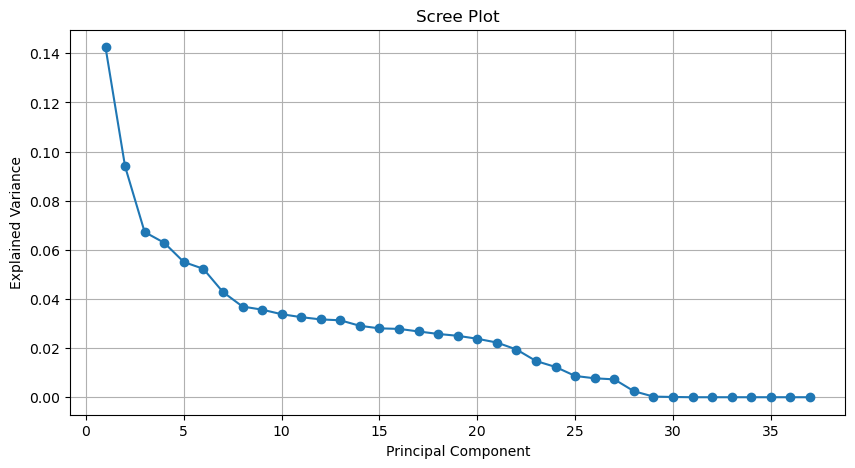

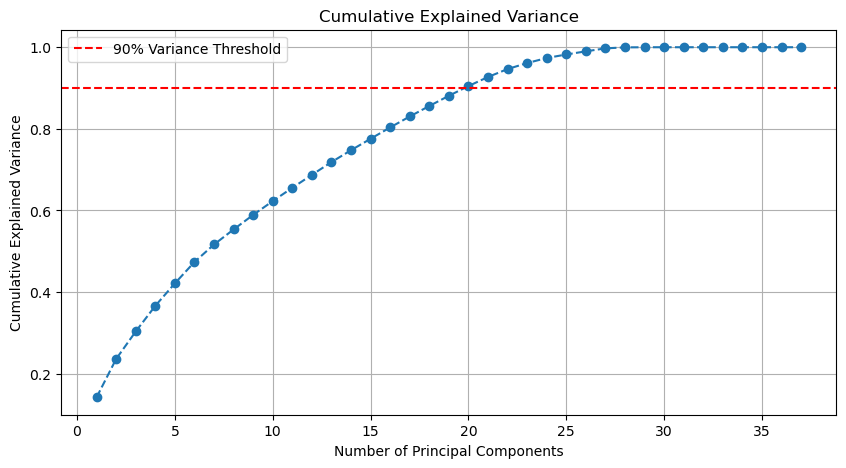

Number of principal components to retain 90% variance: 20


In [678]:
# Draw a Scree Plot Chart to select the number of principal components
import matplotlib.pyplot as plt

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.show()

# Determine the number of components for 100% variance
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of principal components to retain 90% variance: {n_components}")

In [679]:
# Select the quantity of principal component
pca_data = data @ sorted_eigenvectors[:, :20]

In [680]:
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.998234,1.691165,0.516612,0.644040,1.656169,-0.699679,-1.497654,0.089724,0.161703,0.432738,-0.461524,-0.964002,0.489573,-0.430936,-0.584993,-0.049218,-1.116382,-0.643841,-0.630159,0.787917
1,2.060941,-0.348320,-0.053080,-0.821870,0.098928,-0.252861,1.658042,-1.238708,-1.221643,0.402108,-0.092867,-0.346025,0.399983,0.558564,0.143683,-0.098208,0.655783,1.284130,-1.189939,0.590870
2,-3.895637,2.003255,0.333589,-0.973950,-1.347581,0.642959,2.043790,-0.589836,-0.902352,-0.295486,0.360392,-0.703580,-0.450713,-0.273146,-0.899252,-1.012415,-1.603917,-0.347952,-1.084526,-0.574975
3,-3.446670,2.037377,0.221765,0.066365,1.019097,-0.714570,-1.124550,0.578640,1.070058,-0.140944,-1.552055,-0.036305,0.538954,-0.033778,-0.279213,-0.700444,-0.088692,-0.717546,-2.234803,-0.716998
4,-1.932829,1.555804,0.161405,-2.430769,0.272964,-1.218619,-0.320512,0.499850,-0.375487,0.620582,-0.285002,0.310730,-1.860564,-0.842691,-0.385141,-0.238141,-0.882451,-0.114220,-1.146286,0.328001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,-4.770793,-2.314153,-1.878765,0.704540,0.526673,1.497683,-0.639094,-0.453103,1.176243,3.928130,1.376699,-0.756066,-1.020301,0.327942,-2.144665,1.438976,-2.264390,0.813619,1.240923,-1.093654
26213,-5.666020,-1.897161,-1.739604,-0.276051,0.049518,1.270870,-0.536230,0.440917,1.572202,2.625009,3.535702,-0.165462,0.812787,-1.248110,0.604665,1.301879,-2.058754,0.945435,0.801207,-1.735821
26214,-1.147164,-4.460647,-1.154629,1.388284,1.180060,1.152304,0.406413,-0.148837,3.318473,2.315724,1.439514,0.506057,-0.521021,0.311120,0.754692,0.734711,-2.067034,0.647175,-0.283139,-1.072412
26215,-5.771342,-10.816424,-5.429580,0.912387,2.268706,-1.087894,-0.393553,2.364910,-3.222608,-4.107176,-1.968987,-1.364027,-1.079269,0.054202,0.348824,0.930713,-1.880663,0.778285,-1.103934,-0.593846


In [681]:
pca_data.shape

(26217, 20)

In [682]:
# Convert pca_data and data to numpy array
pca_data = pca_data.to_numpy()
data = data.to_numpy()

In [683]:
from sklearn.cluster import KMeans

num_clusters = 6
# Apply K-means on the first principal component
kmeans_pca1 = KMeans(n_clusters=num_clusters)
clusters_pca1 = kmeans_pca1.fit_predict(pca_data[:, :1])

# Apply K-means on the second principal component
kmeans_pca2 = KMeans(n_clusters=num_clusters)
clusters_pca2 = kmeans_pca2.fit_predict(pca_data[:, 1:2])

# Apply K-means on the first 2 principal components
kmeans_pca12 = KMeans(n_clusters=num_clusters)
clusters_pca12 = kmeans_pca12.fit_predict(pca_data[:, :2])

# Apply K-means on the original data
kmeans_original = KMeans(n_clusters=num_clusters)
clusters_original = kmeans_original.fit_predict(data)

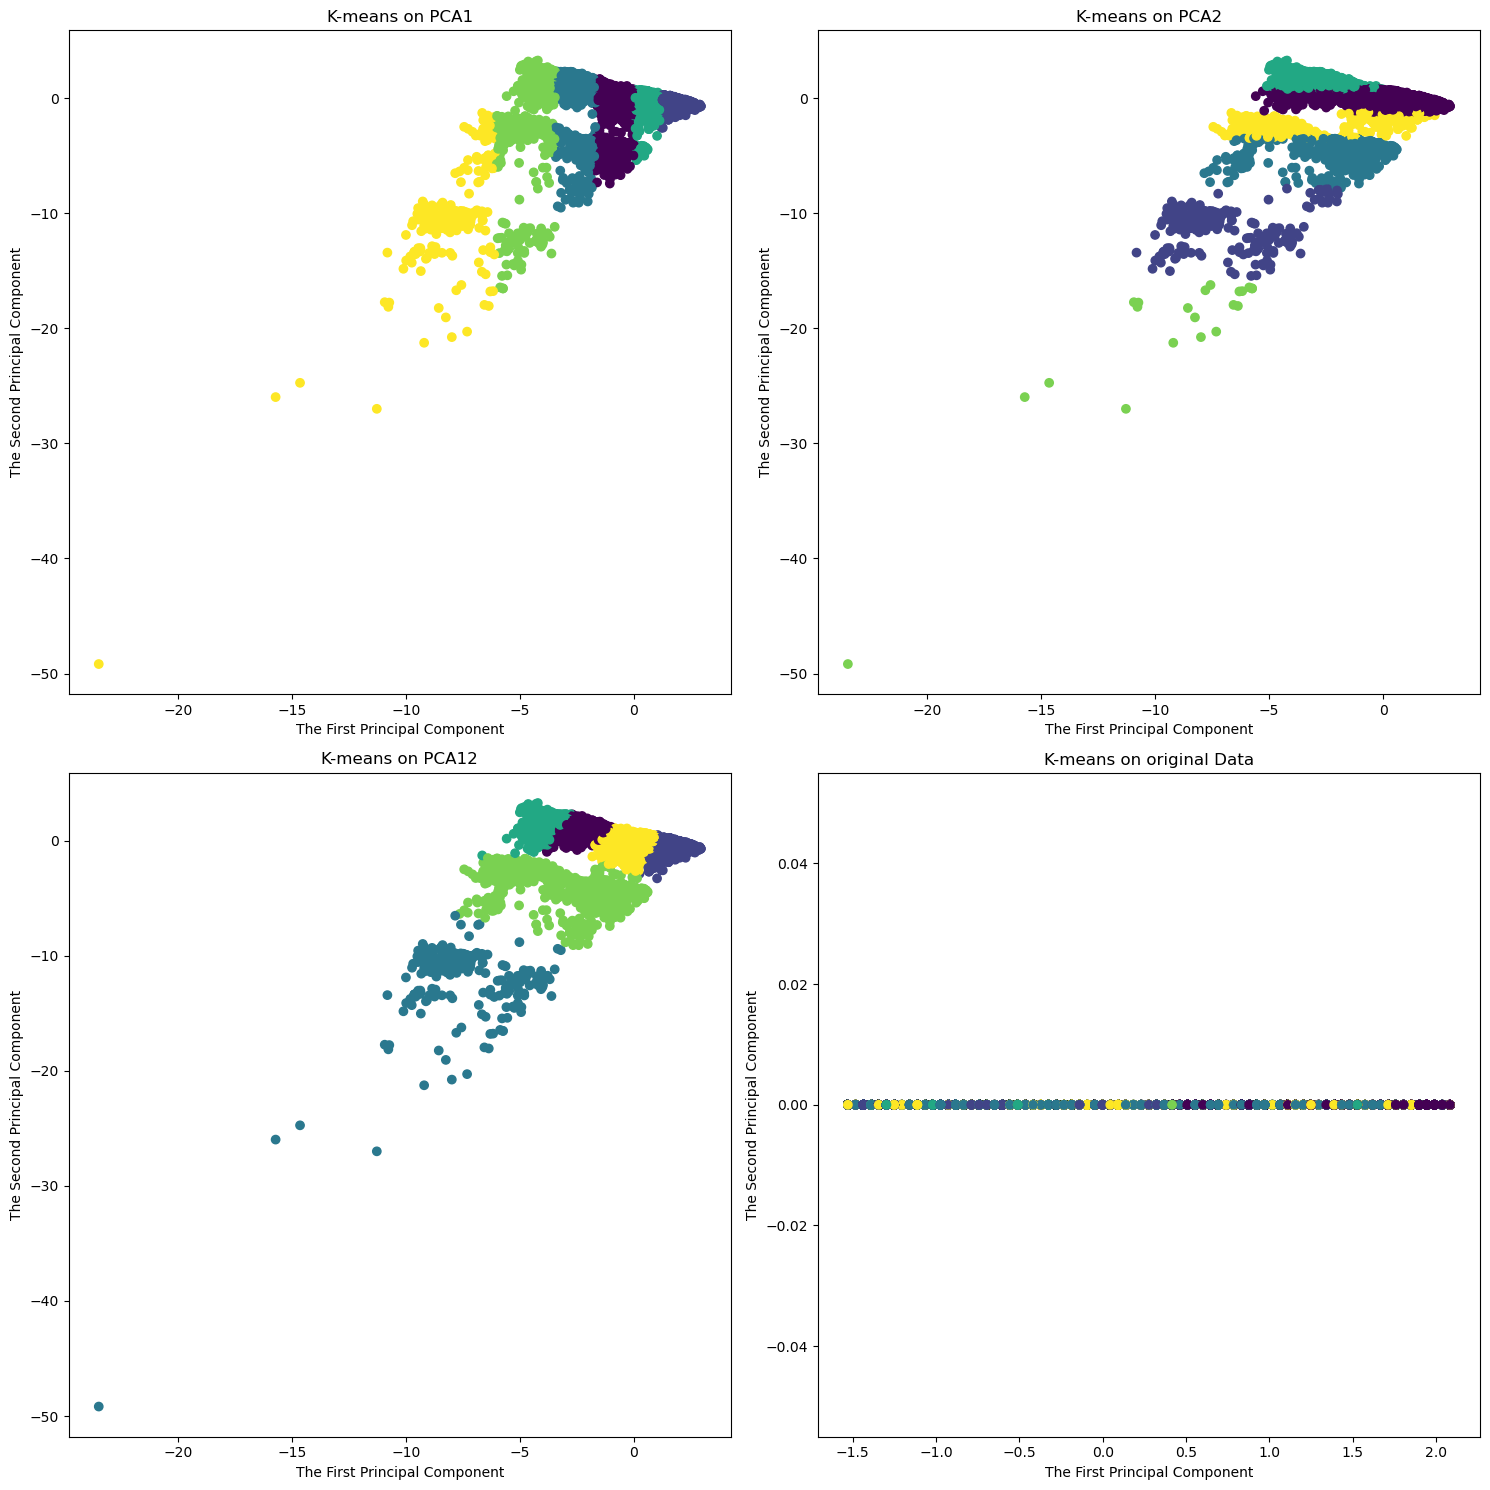

In [684]:
# Plot the data points in 2-dimensional space optained from the first two principal compinents
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # Adjust figsize for desired aspect ratio

# Plot K-means on PCA1
axes[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca1, cmap='viridis')
axes[0, 0].set_xlabel("The First Principal Component")
axes[0, 0].set_ylabel("The Second Principal Component")
axes[0, 0].set_title("K-means on PCA1")

# Plot K-means on PCA2
axes[0, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca2, cmap='viridis')
axes[0, 1].set_xlabel("The First Principal Component")
axes[0, 1].set_ylabel("The Second Principal Component")
axes[0, 1].set_title("K-means on PCA2")

# Plot K-means on PCA12
axes[1, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca12, cmap='viridis')
axes[1, 0].set_xlabel("The First Principal Component")
axes[1, 0].set_ylabel("The Second Principal Component")
axes[1, 0].set_title("K-means on PCA12")

# Plot K-means on original data
axes[1, 1].scatter(data[:, 0], data[:, 1], c=clusters_original, cmap='viridis')
axes[1, 1].set_xlabel("The First Principal Component")
axes[1, 1].set_ylabel("The Second Principal Component")
axes[1, 1].set_title("K-means on original Data")

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

### Liệu phân bố cụm có phù hợp khi sử dụng Kmeans trên bộ dữ liệu gốc không?

Khi nhìn vào biểu đồ "K-means on Original Data" ta có thể thấy các điểm dữ liệu không thể phân cụm và chúng xen kẻ nhau. Vì vậy biểu diễn phân cụm dữ liệu trên dữ liệu gốc là không phù hợp. 

Khó khăn trong việc hiểu và trực quan hóa: Khi có quá nhiều chiều, khó để hiểu và trực quan hóa dữ liệu. Điều này làm giảm khả năng phân tích và giải thích kết quả của phân cụm.

Hiệu suất của thuật toán: Khi số chiều tăng, khả năng của thuật toán K-means giảm. Thuật toán có thể trở nên chậm và khó khăn trong việc tìm ra các cụm hiệu quả.

Sự không đồng đều của các features: Trong không gian high-dimensional, các features có thể không đồng đều về mức độ quan trọng. Điều này có thể dẫn đến kết quả phân cụm không chính xác.

### Điều gì xảy ra khi bạn sử dụng thành phần chính thứ hai để thực hiện phân cụm?

Khi chỉ sử dụng thành phần chính thứ hai, việc phân cụm có thể không chính xác bằng việc sử dụng nhiều thành phần chính hơn, do mất mát thông tin và dựa vào biểu đồ có thể thấy sự phân cụm khác hẳn so với khi dùng thành phần thứ nhất hay dùng cả 2 thành phần. Tuy nhiên biểu đồ phân cụm rất rõ ràng vì vậy thành phần thứ 2 cũng đóng 1 vai trò quan trọng trong việc phân cụm dữ liệu.

### Chọn số lượng thành phần chính và giải thích lựa chọn?

Dựa vào explained_variance và cumulative_explained_variance, chúng ta thấy rằng 20 thành phần chính đầu tiên giải thích phần lớn phương sai của dữ liệu.

Tổng cộng, 20 thành phần chính đầu tiên giải thích khoảng 90% phương sai của dữ liệu, điều này đủ để tạo ra một hình dung tốt về cấu trúc của dữ liệu trong không gian hai chiều. Vì vậy, việc chọn hai thành phần chính là hợp lý để giảm chiều dữ liệu mà vẫn giữ được nhiều thông tin quan trọng.

## Các câu hỏi
### Giải thích tại sao PCA là một phương pháp hữu ích trong giảm chiều dữ liệu?

Vì PCA giúp giảm chiều dữ liệu trong khi vẫn giữ được phần lớn thông tin quan trọng, giúp tăng hiệu quả tính toán và giảm noise.

### Làm thế nào để quyết định số lượng thành phần chính cần sử dụng?

Sử dụng biểu đồ Scree Plot để quan sát tỷ lệ phương sai tích lũy và chọn số lượng thành phần chính tại điểm "gãy" của biểu đồ, nơi mà việc thêm thành phần mới không làm tăng đáng kể tỷ lệ phương sai tích lũy.

### So sánh PCA với ít nhất một kỹ thuật giảm chiều dữ liệu khác?

Một kỹ thuật khác là t-SNE (t-Distributed Stochastic Neighbor Embedding), tập trung vào việc giữ lại cấu trúc cục bộ của dữ liệu. PCA hiệu quả hơn trong việc giảm chiều nhanh chóng và giữ lại phương sai tổng quát, trong khi t-SNE phù hợp hơn để trực quan hóa dữ liệu phức tạp.

# Phần 2: Phân cụm dữ liệu (Clustering) 
# Mục tiêu: Hiểu và sử dụng thuật toán K-means clustering để phân cụm dữ liệu. 
# Dữ liệu: Sử dụng bộ dữ liệu Delay Prediction hoặc bất kỳ bộ dữ liệu nhiều chiều nào.

In [685]:
# Apply K-means Clustering

# Tạo một hàm myKmeans sẽ nhận một tập dữ liệu A và các trung tâm cụm 
# ngẫu nhiên ban đầu, và áp dụng thuật toán K-means (có thể tạo một hàm 
# vẽ biểu đồ có thể được gọi trong mỗi lần lặp để vẽ sự phân bổ cụm). 

def myKmeans(A, num_clusters, max_iter=300):
    np.random.seed(42)
    centroids = A[np.random.choice(A.shape[0], num_clusters, replace=False)]
    
    for _ in range(max_iter):
        distances = np.linalg.norm(A[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        new_centroids = np.array([A[clusters == i].mean(axis=0) for i in range(num_clusters)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

clusters, centroids = myKmeans(pca_data, num_clusters=2, max_iter=300 )

# Sklearn có một hàm tích hợp sẵn là kmeans, thực hiện phân cụm K-means 
# trên một tập dữ liệu quan sát đã cho. Kiểm tra xem hàm này nhận những 
# tham  số  nào  làm  đầu  vào  và  áp  dụng  nó  để  phân  chia  dữ  liệu Delay 
# Prediction thành K = 2 cụm. Liệu các trung tâm cụm có phù hợp với cách 
# triển khai của bạn không?

# Compare with sklearn KMeans
kmeans_sklearn = KMeans(n_clusters=2, max_iter=300, random_state=42)
clusters_sklearn = kmeans_sklearn.fit_predict(pca_data)
centroids_sklearn = kmeans_sklearn.cluster_centers_

print(centroids)
print(centroids_sklearn)

# Check similarity of centroids with a higher tolerance
print(np.allclose(centroids, centroids_sklearn, atol=2.1, rtol=2.1))


[[-3.27576221e+00  7.53664350e-01 -5.92892719e-02 -3.08491633e-01
  -2.21054220e-01 -3.55596020e-02 -1.99087998e-01 -3.79628708e-02
  -4.85772888e-02 -5.00669927e-02 -4.60779771e-02  2.19627244e-02
  -5.88913369e-02 -4.64592466e-03  1.32798176e-02 -1.19899946e-02
   7.23500594e-03  5.93617543e-02  2.01662175e-02 -2.70138923e-02]
 [ 1.13470707e+00 -2.61065429e-01  2.05374969e-02  1.06859905e-01
   7.65720375e-02  1.23176621e-02  6.89630520e-02  1.31501419e-02
   1.68269214e-02  1.73429471e-02  1.59611727e-02 -7.60777402e-03
   2.03996542e-02  1.60932425e-03 -4.60006007e-03  4.15327206e-03
  -2.50616861e-03 -2.05626044e-02 -6.98547335e-03  9.35747244e-03]]
[[ 1.13470707e+00 -2.61065429e-01  2.05374969e-02  1.06859905e-01
   7.65720375e-02  1.23176621e-02  6.89630520e-02  1.31501419e-02
   1.68269214e-02  1.73429471e-02  1.59611727e-02 -7.60777402e-03
   2.03996542e-02  1.60932425e-03 -4.60006007e-03  4.15327206e-03
  -2.50616861e-03 -2.05626044e-02 -6.98547335e-03  9.35747244e-03]
 [-3.2

### Liệu các trung tâm cụm có phù hợp với cách triển khai của bạn không?

Dựa vào kết quả so sánh trả về giữa các centroids là true có thể nói rằng các trung tâm cụm phù hợp với cách triển khai.

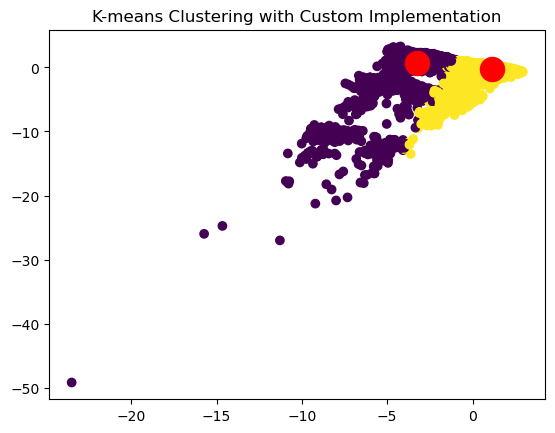

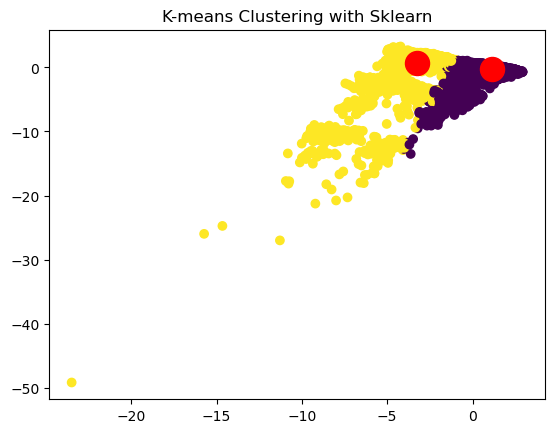

In [686]:
# Draw the results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.title('K-means Clustering with Custom Implementation')
plt.show()

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_sklearn)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], s=300, c='red')
plt.title('K-means Clustering with Sklearn')
plt.show()

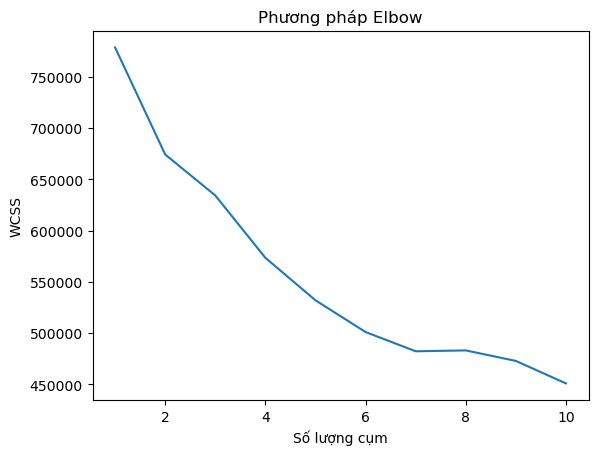

In [687]:
# Elbow method to select the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
plt.show()


### Dựa trên biểu đồ khuỷu tay (elbow plot) trong ảnh bạn cung cấp, số lượng cụm hợp lý để phân chia dữ liệu là 2.

Lý do:

Điểm khuỷu tay: Quan sát biểu đồ, ta thấy điểm khuỷu tay (elbow point) xuất hiện rõ ràng ở vị trí 2 cụm. Đây là điểm mà đường cong giảm dần đột ngột, sau đó bắt đầu phẳng dần ra.
Sự thay đổi độ dốc: Độ dốc của đường cong giảm dần khi số lượng cụm tăng, cho đến khi đạt đến điểm khuỷu tay. Sau điểm này, độ dốc thay đổi ít hơn, cho thấy việc tăng thêm cụm không mang lại nhiều lợi ích trong việc phân biệt dữ liệu.
Link tham khảo: (https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html)

In [688]:
# Chọn số cụm tối ưu dựa trên đồ thị Elbow
optimal_clusters = 2  # Điều chỉnh dựa trên đồ thị Elbow
# Áp dụng K-means với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(pca_data)
pca_data = pd.DataFrame(pca_data)
pca_data['Cluster'] = labels

Chỉ số Silhouette trung bình: 0.28030905987330323
Chỉ số Hopkins: 0.25485458778865383


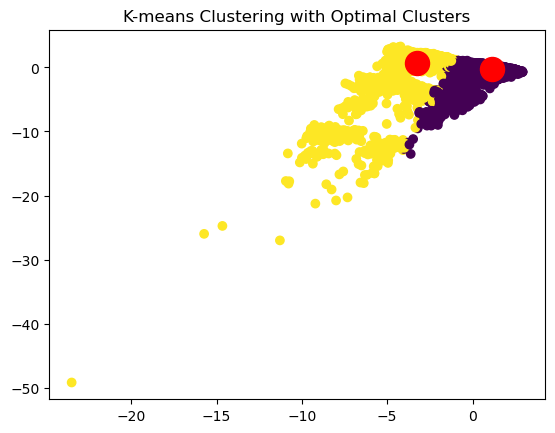

Đặc điểm của từng cụm:
          0         1         2         3         4         5         6  \
0  1.134707 -0.261065  0.020537  0.106860  0.076572  0.012318  0.068963   
1 -3.275762  0.753664 -0.059289 -0.308492 -0.221054 -0.035560 -0.199088   

          7         8         9        10        11        12        13  \
0  0.013150  0.016827  0.017343  0.015961 -0.007608  0.020400  0.001609   
1 -0.037963 -0.048577 -0.050067 -0.046078  0.021963 -0.058891 -0.004646   

        14        15        16        17        18        19  
0 -0.00460  0.004153 -0.002506 -0.020563 -0.006985  0.009357  
1  0.01328 -0.011990  0.007235  0.059362  0.020166 -0.027014  


In [689]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
# Tính toán chỉ số Silhouette
silhouette_avg = silhouette_score(pca_data.iloc[:, :-1], labels)
print(f"Chỉ số Silhouette trung bình: {silhouette_avg}")

# Tính toán chỉ số Hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)  # số mẫu
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X = np.random.choice(n, m)
    X_rand = X[rand_X]

    u_distances = []
    w_distances = []
    for i in range(m):
        u_distances.append(nbrs.kneighbors([X_rand[i]], 2, return_distance=True)[0][0][1])
        rand_point = np.random.rand(d)
        w_distances.append(nbrs.kneighbors([rand_point], 2, return_distance=True)[0][0][1])

    H = sum(u_distances) / (sum(u_distances) + sum(w_distances))
    return H

hopkins_score = hopkins(pca_data.iloc[:, :-1].values)
print(f"Chỉ số Hopkins: {hopkins_score}")

# Vẽ biểu đồ phân cụm
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means Clustering with Optimal Clusters')
plt.show()

# Phân tích đặc điểm của từng cụm
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=pca_data.columns[:-1])
print("Đặc điểm của từng cụm:")
print(cluster_centers_df)

Chỉ số Silhouette trung bình (0.2803) cho thấy các cụm không rõ ràng, các điểm dữ liệu nằm gần ranh giới giữa các cụm.

Chỉ số Hopkins (0.2561) cho thấy có sự hiện diện của cấu trúc cụm trong dữ liệu, tức là dữ liệu có xu hướng tụ lại thành các cụm nhất định thay vì phân bố ngẫu nhiên.

Như vậy, mặc dù dữ liệu có xu hướng tạo thành các cụm, nhưng ranh giới giữa các cụm này không rõ ràng lắm. Có thể cần phải xem xét lại phương pháp hoặc số lượng cụm hiện tại để cải thiện chất lượng phân cụm.

Cụm 1 (Tím): Cụm này dường như chứa các điểm dữ liệu tập trung tương đối chặt chẽ. Điều này cho thấy rằng các điểm dữ liệu trong cụm này có chung một số đặc điểm hoặc tính năng chung.

Cụm 2 (Vàng): Cụm này có sự phân bố điểm dữ liệu phân tán hơn, cho thấy sự đa dạng hơn về đặc điểm hoặc giá trị giữa các thành viên của nó.

## Các câu hỏi

### Giải thích sự cần thiết của việc biến đổi, chuẩn hóa dữ liệu trước khi thực hiện phân cụm.

Chuẩn hóa dữ liệu trước khi phân cụm là cần thiết vì các thuật toán phân cụm như K-means sử dụng khoảng cách để xác định sự tương đồng giữa các điểm dữ liệu. Nếu các đặc trưng có đơn vị hoặc phạm vi giá trị khác nhau, chúng có thể ảnh hưởng không đều đến kết quả phân cụm. Chuẩn hóa giúp đảm bảo rằng mỗi đặc trưng đóng góp công bằng vào tính toán khoảng cách.

### So sánh và đối chiếu giữa kết quả của K-means và Hierarchical clustering.

#### K-means:

Là một thuật toán phân cụm không giám sát, chia dữ liệu thành 𝐾 cụm.

Cần phải chỉ định trước số lượng cụm.

Có thể nhanh hơn và hiệu quả hơn cho các tập dữ liệu lớn.

Nhạy cảm với giá trị ngoại lệ và hoạt động tốt nhất với các hình dạng cụm cầu.

#### Hierarchical clustering:

Không cần chỉ định trước số lượng cụm.

Thường chậm hơn, mở rộng không tốt và ít hiệu quả hơn cho các tập dữ liệu lớn.

Không nhạy cảm với giá trị khởi tạo.

### Thảo luận về cách lựa chọn số lượng cụm và ảnh hưởng của nó đến kết quả.

Số lượng cụm có thể được chọn bằng cách sử dụng phương pháp Elbow, Silhouette score hoặc các phương pháp khác. Chọn số lượng cụm phù hợp là quan trọng vì nó ảnh hưởng trực tiếp đến sự chính xác và ý nghĩa của các cụm. Số lượng cụm quá ít có thể không nắm bắt được sự phức tạp của dữ liệu, trong khi số lượng cụm quá nhiều có thể dẫn đến việc phân cụm không thực tế hoặc quá khớp.

### So sánh K-means với một thuật toán phân cụm khác, như DBSCAN hoặc hierarchical clustering.

#### K-means so với DBSCAN:

#### K-means:

Giả định rằng các cụm có hình dạng cầu và có kích thước tương tự.

Cần phải chỉ định trước số lượng cụm.

Nhạy cảm với các giá trị ngoại lệ.

#### DBSCAN:

Phân cụm dựa trên mật độ, không cần chỉ định trước số lượng cụm.

Có thể tìm các cụm có hình dạng bất kỳ.

Có khả năng xử lý các giá trị ngoại lệ tốt hơn.

DBSCAN thích hợp hơn khi làm việc với dữ liệu có mật độ không đều hoặc chứa nhiều giá trị ngoại lệ.